# HAE Problem 

Para esse problema iremos trabalhar com dois tipos de métodos:
- LogisticRegression  
- Logistic Regression with StatsModels 

PRECISAMOS TOMAR OS DADOS E REALIZAR ALGUMAS VERIFICAÇÕES INICIAIS PARA SABER COMO OS DADOS ESTÃO DIPOSTOS


In [2]:
# Importando as bibliotecas necessárias que foram utilizadas ou que foram utilizadas para verificação previamente
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from subprocess import check_output
from random import * # importa todas as funções de crianção pseudorandômica

# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure


from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from random import*
######
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report, confusion_matrix


import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

print('matplotlib version: {}'.format(mlp.__version__))


print('seaborn version: {}'.format(sns.__version__))

print('numpy version: {}'.format(np.__version__))

matplotlib version: 3.2.1
seaborn version: 0.10.0
numpy version: 1.18.1


In [3]:
#Lendo os dados 
dfPoints = pd.read_csv("./Downloads/Emprego/df_points.txt", delimiter="\t")


In [4]:
display(dfPoints.head())

Unnamed: 0           x           y           z  label
0           0  326.488285  188.988808 -312.205307    0.0
1           1 -314.287214  307.276723 -179.037412    1.0
2           2 -328.208910  181.627758  446.311062    1.0
3           3 -148.658890  147.027947  -27.477959    1.0
4           4 -467.065931  250.467651 -306.475330    1.0

In [5]:
dfPoints.shape
#Verificando o formato. No caso temos 10000 linhas e cinco colunas. Logo, os dados estão
#de acordo com as infomações  fornecidas.

(10000, 5)

In [10]:
#Renomeando as colunas 
dfPoints.columns = ['index', 'x', 'y','z','label']

In [11]:
# Ao executar uma breve descrição dos dados, pode-se concluir que para x,y e z
#a sua variação vai de -499 até 499 (valores inteiros) em termos de valores mínimos e máximos
#e seu std também permanece dentro de uma variação de 3 pontos para y sendo a mediana

#Mediana é o valor do meio 

display(dfPoints.describe())

index             x             y             z         label
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000
mean    4999.50000      0.850362     -3.108769     -2.601124      0.502700
std     2886.89568    288.379928    287.120263    290.379789      0.500018
min        0.00000   -499.802348   -499.899134   -499.952571      0.000000
25%     2499.75000   -249.199895   -248.954580   -258.005693      0.000000
50%     4999.50000      3.663472     -5.446168     -8.221000      1.000000
75%     7499.25000    248.879970    244.395864    252.930406      1.000000
max     9999.00000    499.872453    499.752418    499.872329      1.000000

In [8]:
#Os dados não  apresentam nenhum missing data
dfPoints.isna().sum()

index    0
x        0
y        0
z        0
label    0
dtype: int64

Vamos verificar como cada coluna interage com a outra e seus valores. Como podemos verificar os valores do index X index mostram como está disposto os valores de 1 e 0 para o label. Do mesmo modo há a mesma interação para com os valores x X x, y X y e z X z.

Para essas colunas a distribuição de 0 e 1 é perceptível.

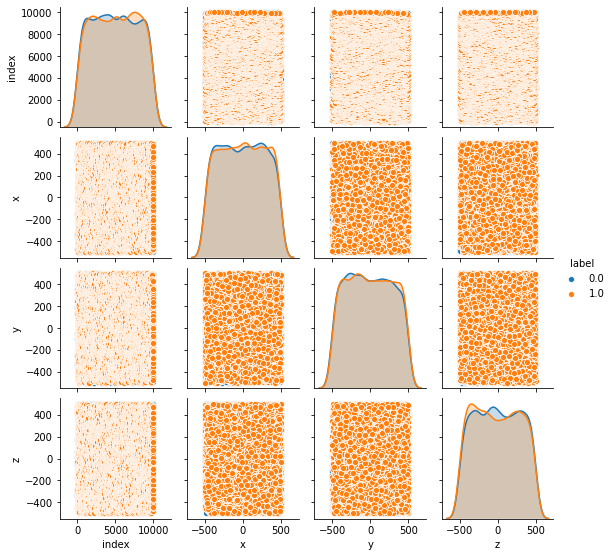

In [9]:
#Vamos verificar como o label e cada coluna interage com x,y,z e unamed
sns.pairplot(data=dfPoints,hue='label',height=1.9)

No próximo plot utilizamos a biblioteca Plotly para visualizar a distribuição de 0 e 1 por planos **(plano x e y ou y e z)** e para 3 eixos, ou seja, 3d. As bolas azuis são as distribuições para x e y do label 0, enquanto as amarelas representam o valor 1. Aparentemente, ao olhar para algo assim, não temos como relacionar nada e nem retirar nenhuma informação desses dados. 

In [12]:

import plotly.express as px
df = px.data.iris()
fig = px.scatter(dfPoints, x="x", y="y", color="label")
fig.show()

Ao olhar para um gráfico **3d** desses dados, a tentativa de visualizar alguma relação parece ainda mais fora da realidade. Há literalmente um aglomerado de infomarção distribuído de forma quase simétrica. Isso já é algo bom, essa simetria. Essa distribuição quase simétrica torna o nosso campo de trabalho mais organizado e focado, uma vez que essas informações estão distribuídas dessa forma.

In [14]:
import plotly.express as px
fig = px.scatter_3d(dfPoints, x='x', y='y', z='z',
              color='label')
fig.show()

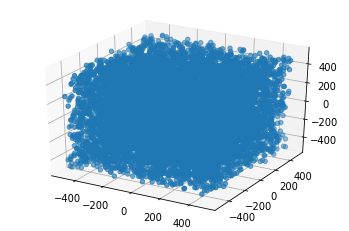

In [540]:
# Olha os dados sem nenhum tipo de identificação com o label. 
#Seria ainda mais trabalhoso conseguir alguma relação com as 3 colunas.

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test.iloc[:, 0],Y_test.iloc[:, 0],Z_test.iloc[:, 0])
    
plt.show()

# Machine Learning

Porém, extrair informações e tentar entender melhor como é dado o comportamento da distribuição do label 0 ou 1 para essses dados pode sim ser estudado. A representação cartesiana desses dados nos indicam o caminho, uma vez que deve haver algum possível comportamento que determina a escolha do label. **Utilizaremos Machine Learning para executar esse tipo de estudo.**



In [531]:
#Para começar o trabalho de análise precisamos trabalhar com arrays. Segue um exemplo
dfPoints[['x','y','z']].values # transformar dataframe em array

array([[ 326.48828486,  188.98880779, -312.20530651],
       [-314.28721419,  307.27672314, -179.03741228],
       [-328.20891006,  181.62775751,  446.3110616 ],
       ...,
       [-401.67510502, -273.32216919,  230.79582259],
       [-378.61572605,   73.22727899, -368.64422212],
       [ 274.77182961, -140.92580912,   59.42790503]])

A idéia por de trás da análise de dados e o uso de método de análise é saber sobre os comportamentos de um certo dado. Muitas são as condições para temos a certeza de um certo comportamento. O exemplo abaixo exemplifica de modo simples uma condição que poderia existir para um conjunto de dados parecido com o analisado neste trabalho

In [28]:
def positivenumber(number):
    return  number > 0 

In [29]:
if positivenumber(dfPoints.loc[0,'x']) and positivenumber(dfPoints.loc[0,'y'] and positivenumber(dfPoints.loc[0,'z'])):
    print(1)
else:
    print(0)

0


Há a imposição de condições a serem satisfeitas para o label ser 1 ou 0 (Os valores das colunas tem que ser todos positivos). *Isso seria bem simples de identificar, mas não é o caso.* Como vimos anteriormente, é bem mais trabalhoso identificar a condição para determinar o label. 

**A beleza está nos detalhes** 

 A idéia é essa! Entender o quão possível é a predição de um conjunto de dados para uma dada variável. No nosso caso são 3 detalhes (variáveis) importantíssimos (x,y,z). 

# Explorando os dados de zero e um

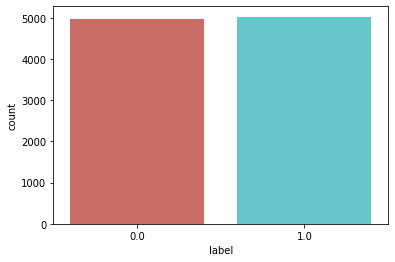

O valores de 1 são: 4973
O valores de 0 são: 4973
O valores de % de um são: 4974.0
O valores de % de um são: 4974.0


(4973, 4973, 4974.0, 4974.0)

In [99]:

one = dfPoints.query("label==1")
zero = dfPoints.query("label==0")


sns.countplot(x='label',data=dfPoints,palette='hls')
plt.show()

one =len(dfPoints[dfPoints['label']==0])
zero =len(dfPoints[dfPoints['label']==0])

pct_one = one/one+zero
pct_zero = zero/one+zero



#Temos esses valores de 0 e 1 atribuídos aos valores de x,y e z. Temos que então trabalhar com esses dados
print("O valores de 1 são:",one)
print("O valores de 0 são:",zero)
print("O valores de % de um são:",pct_one)
print("O valores de % de um são:",pct_zero)
one, zero,pct_one,pct_zero

O resultado acima demonstra que os nossos dados estão balanceados, uma vez que a porcentagem de 0 e 1 estão distribuídas igualmente. Isso facilita a preparação dos dados, pois não precisaremos balacear as informações dadas as variáveis.

# Segregate a test and training frame.

Precisamos separar dados  para o treino e teste. Tomaremos X% dos dados existentes para o treino do modelo. A escolha dessa porcentagem pode ser executada de modo a entender como o treino pode influenciar a predição. 

Obs: Nos escolhemos treinar com 99,9% dos dados.


In [169]:
# distribuídos em termos de x,y e z
X = dfPoints.groupby(['index'])[['x']].agg('sum') 
Y = dfPoints.groupby(['index'])[['y']].agg('sum') 
Z = dfPoints.groupby(['index'])[['z']].agg('sum') 
#Distribuídos em termo do label e das colunas
X_rank = dfPoints.groupby(['index'])[['x','label']].agg('sum')
Y_rank = dfPoints.groupby(['index'])[['y','label']].agg('sum')
Z_rank = dfPoints.groupby(['index'])[['z']].agg('sum')
label_rank = dfPoints.groupby(['index'])[['label']].agg('sum')



# Split the data into training/testing sets 
#Separando os dados em um grupo de teste
#
label_t = label_rank.sample(frac=0.2)

X_train = X.sample(frac=0.2)
Y_train = Y_rank.sample(frac=0.2)
Z_train = Z_rank.sample(frac=0.2)



dfPoints_train = dfPoints.sample(frac=0.2)
dfPoints_test = dfPoints.sample(frac=0.2)

arr_label_t = label_t[['label']].values
arr_label_t = arr_label_t.reshape(-1,)

arr_X_train = X_train[['x']].values
arr_X_train = arr_X_train.reshape(-1,1)
arr_Y_train = Y_train[['y','label']].values
arr_Y_train = arr_Y_train.reshape(-1,2)





arr_dfPoints_train = dfPoints_train[['x','y','z','label']].values
arr_dfPoints_test = dfPoints_train[['x','y','z','label']].values

# Fiz todas essas separações com o intuito de deixar de fácil acesso a possíbilidade 
#de manipular os parâmetros e treinar o modelo utilizado apenas uma coluna, 2 ou 3.


In [170]:
# Uma separação com todas as colunas 
t_rank = dfPoints.groupby(['index'])[['x','y','z']].agg('sum') 

t_rank_train = t_rank.sample(frac=0.2)

arr_t_rank_train = t_rank_train[['x','y','z']].values
# arr_Y_train = arr_Y_train.reshape(-1, order='C')
arr_Y_train = arr_Y_train.reshape(-1,1)
arr_t_rank_train

array([[-378.61572605,   73.22727899, -368.64422212],
       [ 142.39091434, -336.60316517,  116.58205145],
       [ -96.43323335,  417.02999156,  -48.49487118],
       ...,
       [  25.32069981,  455.10891622, -231.03734084],
       [-406.22099451,  -61.957558  , -375.27702799],
       [-107.50512325,  -17.3671809 , -322.04601361]])

# Criando o ***data Test***

Utilizamos esse valor (-499.952571,499.872454) para gerar os números pseudorandômicos, uma vez que é o próximo número dos extremos de cada coluna. Assim nosso teste seria gerado dentro do domínio dos dados. Pode-se, é claro, extrapolar para depois desses valores.

In [171]:

test_arr = []
test_arr_x = []
for i in range(30000):
    n = uniform(-499.952571,499.872454) #  
    test_arr.append(n)
#     test_arr = test_arr.reshape(-1,)
test_arr = np.array(test_arr)
# test_arr = test_arr.arange(30000).reshape((10000, 3))
test_arr = np.reshape(test_arr,(10000,3))
for i in range(10000):
    s = uniform(-499.952571,499.872454)
    test_arr_x.append(n)
test_arr_x = np.array(test_arr_x)    
test_arr_x = np.reshape(test_arr_x,(10000,1))
# test_arr_x.shape
#     print(n)
#     print(test_arr)

In [38]:
dfPoints.iloc[:,1:-1]

x           y           z
0     326.488285  188.988808 -312.205307
1    -314.287214  307.276723 -179.037412
2    -328.208910  181.627758  446.311062
3    -148.658890  147.027947  -27.477959
4    -467.065931  250.467651 -306.475330
...          ...         ...         ...
9995 -324.762823 -267.451535   73.363576
9996 -362.470736  176.772240  138.991471
9997 -401.675105 -273.322169  230.795823
9998 -378.615726   73.227279 -368.644222
9999  274.771830 -140.925809   59.427905

[10000 rows x 3 columns]

In [26]:
#Caso haja algum problema com os arrays, pode-se utilizar esse método. Obs: continuous Problem


# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(arr_Y_train)
# print(training_scores_encoded)
# print(utils.multiclass.type_of_target(arr_Y_train))
# print(utils.multiclass.type_of_target(arr_Y_train.astype('int')))
# print(utils.multiclass.type_of_target(training_scores_encoded))

# LOGISTIC REGRESSION MODEL

**É  uma  técnica  recomendada  para  problemas  em que a variável dependente é   de cunho dicotômico ou binário (1, ou 0). A regressão logística é uma ferramenta que nos permite estimar a probabilidade associada à ocorrência de determinado evento em vista de um conjunto de variáveis explanatórias (x,y,z).**

Como o intuito desse problema em si não é exatamente desenvolver uma melhor predição, mas sim explorar através de dois modelos, sendo um deles obrigatório (LR) e outro a escolha, utilizamos uma configuração simples do LR.
A equação de regressão logística pode ser descrita como:

 $P(Y=1,0)= 1/(1-e^{g(-x)})$ 
 
 em que para um conjunto P de variáveis independentes teremos Y=1 ou 0

In [172]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix





#LOGISTIC REGRESSION MODEL
clf = LogisticRegression(solver='liblinear',penalty='l2', C=0.05)
# clf.fit(arr_X_train,arr_label_t)
clf.fit(arr_t_rank_train,arr_label_t)
# arr_t_rank_train

# print("LogisticRegression")
# print(clf.predict(arr_t_rank_train))


# Step 4: Evaluate the model
p_pred = clf.predict_proba(arr_t_rank_train)
p_log_pred = clf.predict_log_proba(arr_t_rank_train)
y_pred = clf.predict(arr_t_rank_train)
score_ = clf.score(arr_t_rank_train, arr_label_t)
conf_m = confusion_matrix(arr_label_t, y_pred)
report = classification_report(arr_label_t, y_pred)


# print("LogisticRegression")
print(clf.predict(arr_t_rank_train))
print("Logistic Regression output")


print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(arr_t_rank_train, arr_label_t)))

print('conf_m (Matriz confusão):', conf_m, sep='\n', end='\n\n')

print('report:', report, sep='\n')

[1. 0. 1. ... 1. 1. 1.]
Logistic Regression output
Accuracy of logistic regression classifier on test set: 0.52
conf_m (Matriz confusão):
[[621 390]
 [564 425]]

report:
              precision    recall  f1-score   support

         0.0       0.52      0.61      0.57      1011
         1.0       0.52      0.43      0.47       989

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



# Detalhando os resultados:

- O valor de score_ determina a acurácia dos testes executados para o nosso modelo. O resultado salienta que a acurácia mal passa de 50%, logo, os parâmetros utilizados ou mesmo o modelo não são a melhor escolha para tratar essa situação.
-  Os resultados da matriz de confusão está nos dizendo que temos L11+ L22 predições corretas e L12+L21  predições incorretas. **Obs:** LXX, em que XX indica a linha e coluna da matriz confusão.
- A precisão (precision) está nos dando em outras palavras os valores de $lv/(lv+fp)$, em que lv é label verdadeiro e fp é falso positivo.** A precisão é basicamente a capacidade do classificador de não definir uma amostra como positiva se for negativa.**
-  Recall está nos dando em outras palavras os valores de $lv/(lv+fn)$, em que lv é label verdadeiro e fp é falso negativo.** Recall é basicamente a capacidade do classificador de não definir uma amostra como negativa se for positiva.**
- A pontuação F-beta pode ser entendida como uma média harmônica ponderada da precisão e recall, em que uma pontuação F-beta atinge seu melhor valor em 1 e pior pontuação em 0.
- O suporte é o número de ocorrências de cada classe no teste (Y), em que Y é o array de teste.

O mesmo pode ser feito para uma variável x

In [173]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# label_t = label_rank.sample(frac=0.2)
# arr_label_t = label_t[['label']].values
# arr_label_t = arr_label_t.reshape(-1,)

#LOGISTIC REGRESSION MODEL
clf1 = LogisticRegression(solver='liblinear',penalty='l2', C=0.05, random_state=0)
clf1.fit(arr_X_train,arr_label_t)
# clf.fit(arr_t_rank_train,arr_label_t)
# arr_t_rank_train

# print("LogisticRegression")
# print(clf.predict(arr_t_rank_train))


# Step 4: Evaluate the model
p_pred1 = clf1.predict_proba(arr_X_train)
y_pred1= clf1.predict(arr_X_train)
score_1 = clf1.score(arr_X_train, arr_label_t)
conf_m1 = confusion_matrix(arr_label_t, y_pred)
report1 = classification_report(arr_label_t, y_pred)


# print("LogisticRegression")
# print(clf.predict(arr_X_one))

print('score_:', score_1, end='\n\n')

print('y_pred:', y_pred1, end='\n\n')

print('conf_m:', conf_m1, sep='\n', end='\n\n')

print('report:', report1, sep='\n')

score_: 0.5135

y_pred: [0. 0. 1. ... 0. 1. 0.]

conf_m:
[[621 390]
 [564 425]]

report:
              precision    recall  f1-score   support

         0.0       0.52      0.61      0.57      1011
         1.0       0.52      0.43      0.47       989

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



- Temos o mesmo (~) comportamento para a acurácia do uso simples da LR  e para os outros resultados.

Tentando manualmente verificar a capacidade de prever os dados treinados.

In [166]:
#testing the model
# Pegamos as primeiras linhas do dados e conferimos o seu formato
x_arra = np.array([[326.48828486,  188.98880779, -312.20530651]])# linha número 0 dos dados
x_arra2 = np.array([[-314.287214,307.276723,-179.037412]])
x_arra.shape

(1, 3)

In [167]:
# Em seguida tomamos o valor da predição e testamos a máquina com o que ela aprendeu.
predd = clf.predict(x_arra)
# predd1 = clf.predict(x_arra2)
predd

array([1.])

Esse resultado indica que a máquina não consegue indicar corretamente, pelo menos um valor correspondente dos labels. Assim não temos uma boa previsão estabelecida com o treino dessa máquina.

In [174]:
# Testando com com o data_test
test_arr = test_arr[:2000]

test_pred = clf.predict(test_arr)


# Step 4: Evaluate the model
p_pred2 = clf.predict_proba(test_arr)
y_pred2= clf.predict(test_arr)
score_2 = clf.score(test_arr, arr_label_t)
conf_m2 = confusion_matrix(arr_label_t, y_pred2)
report2 = classification_report(arr_label_t, y_pred2)


# print("LogisticRegression")
# print(clf.predict(arr_X_one))

print('score_:', score_2, end='\n\n')

print('y_pred:', y_pred2, end='\n\n')

print('conf_m:', conf_m2, sep='\n', end='\n\n')

print('report:', report2, sep='\n')

score_: 0.4975

y_pred: [1. 0. 0. ... 0. 1. 0.]

conf_m:
[[601 410]
 [595 394]]

report:
              precision    recall  f1-score   support

         0.0       0.50      0.59      0.54      1011
         1.0       0.49      0.40      0.44       989

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



Quando olhamos os dados realizados com os dados criados para o teste temos que os resultados apresentados seguem os mesmo tipo de comportamento do treino realizado na máquina. Tendo acurácia abaixo de 50%

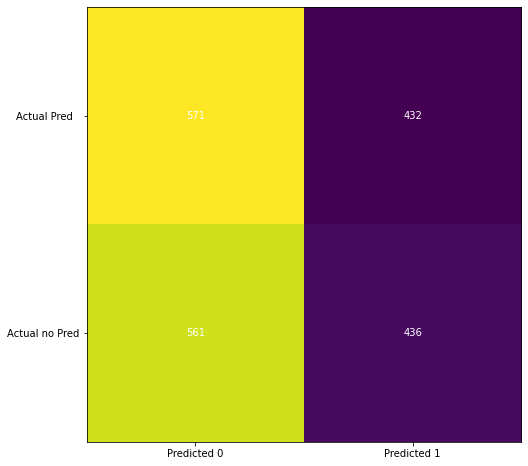

In [124]:
# Você pode usa matplotlib, uma vez que ele aceita o formato de matriz para seus gráficos
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_m)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Pred  ', 'Actual no Pred'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_m[i, j], ha='center', va='center', color='white')
plt.show()


Text(0.5, 257.44, 'Predicted label')

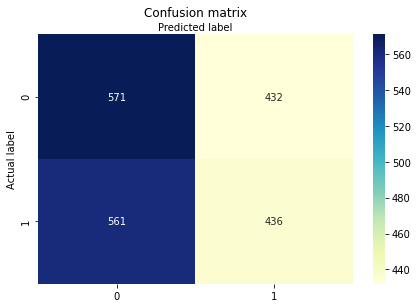

In [133]:
class_names=[0,1] # name  of label (classes)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


Também é possível realizar um pequeno teste de Receiver Operating Characteristic(ROC) em que teremos a razão entre os positivos e os falsos negativos.

# c) **Logistic Regression  with StatsModels**

Usamos agora outra ferramenta para  abordar os dados disponíveis. statsmodels será a nossa ferramenta.

O StatsModels é desenvolvido em termos de regressão linear.

In [127]:
import statsmodels.api as sm

#Criando o modelo
model = sm.Logit(arr_label_t, arr_X_train)


In [162]:
result = model.fit(method='newton')
model.fit().params
#Agora o modelo está criado e podemos obter os parâmetros b0 e b1 atribuídos a


Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


array([0.00011273])

In [128]:
test_arr = np.reshape(-1,1)
result.predict(test_arr)


array([0.49997182])

Aqui geramos a probabilidade para gerar as predições  através do predict()

In [158]:
par = result.params
par


array([0.00011273])

In [433]:
result.predict(arr_X_train)


array([0.49723262, 0.50226034, 0.50184718, ..., 0.49744091, 0.49723792,
       0.49905059])

Neste ponto temos as definições das predições para o label comparando o treino executado para o modelo

In [434]:
(result.predict(arr_X_train) >= 0.5).astype(int)


array([0, 1, 1, ..., 0, 0, 0])

A matriz confusão também foi calculada

In [129]:
confm = result.pred_table()
confm

array([[517., 486.],
       [502., 495.]])

Text(0.5, 257.44, 'Predicted label')

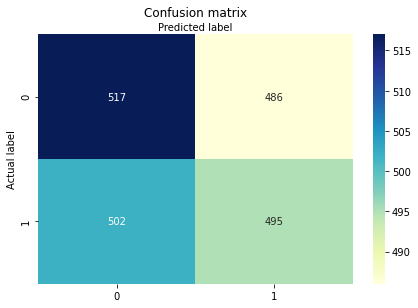

In [134]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


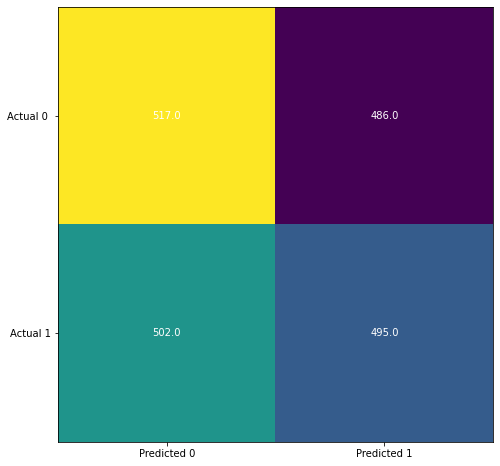

In [130]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0 ', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confm[i, j], ha='center', va='center', color='white')
plt.show()


In [131]:
 result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1999
Method:                           MLE   Df Model:                            0
Date:                Mon, 04 May 2020   Pseudo R-squ.:               0.0001848
Time:                        10:53:56   Log-Likelihood:                -1386.0
converged:                       True   LL-Null:                       -1386.3
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.000      0.728      0.466      -0.000       0.000
==============================================================================
"""

In [132]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.000    
Dependent Variable: y                AIC:              2774.0582
Date:               2020-05-04 10:54 BIC:              2779.6591
No. Observations:   2000             Log-Likelihood:   -1386.0  
Df Model:           0                LL-Null:          -1386.3  
Df Residuals:       1999             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1      0.0001      0.0002    0.7283    0.4664    -0.0002    0.0004
================================================================

"""

 Utilizando o statsmodel, que é desenvolvido em termos de valores discretos, podemos comparar com o modelo LR sendo ele (statsmodel) um melhor modelo. Eu utilizei um simples solução baseado em um fit newton, logo não teremos uma eficiência grande comparada ao LR. Podemos realizar uma comparação detalhada para cada modelo e utilização dos parâmetros, porém não é o intuito deste problema adentrar em cada função e característica mais profunda dos modelos.